<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/Cerebro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sigm = lambda x: 1/(1+np.exp(-x))

In [6]:
x = np.linspace(-10,10,100)
y = sigm(x)

In [7]:
#plt.plot(x,y)

In [41]:
class Layer:

  def __init__(self,NC,NN, ActFunc):

    self.NC = NC
    self.NN = NN
    self.ActFunc = ActFunc

    self.W = np.random.uniform(-10,10, size=(self.NC,self.NN))
    self.b = np.random.uniform(-10,10, size=(1,self.NN))

  def Activation(self,x):
    z = np.dot(x,self.W) + self.b
    return self.ActFunc(z)

  def Mutate(self):
    self.W += np.random.uniform(-10,10, size=(self.NC,self.NN))
    self.b += np.random.uniform(-10,10, size=(1,self.NN))

In [42]:
l0 = Layer(2,2,sigm)

In [43]:
l0.W

array([[-3.06193486, -4.37225959],
       [ 7.39508403,  2.38145981]])

In [44]:
l0.b

array([[ 8.24107052, -4.94016318]])

In [45]:
l0.Activation(np.array([0,0]))[0]

array([0.99973647, 0.00710262])

In [46]:
x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)
N = np.zeros_like(X)
N1 = np.zeros_like(X)

for i in range(50):
  for j in range(50):
    N[i,j] = l0.Activation(np.array([x[i],y[j]]))[0][0]
    N1[i,j] = l0.Activation(np.array([x[i],y[j]]))[0][1]

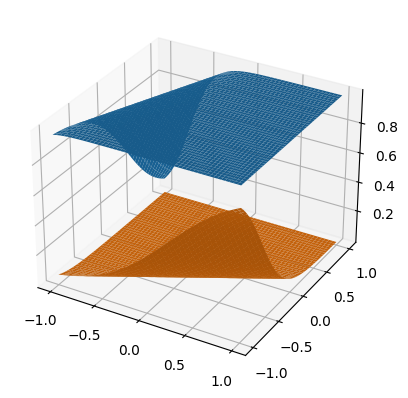

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,N)
ax.plot_surface(X,Y,N1)